<hr>

# Welcome to Week 2

<hr>

<hr>

# Data wrangling
<hr>
Data wrangling is the procedure of acquiring, analysing, and manipulating raw data into a suitable format for faster processing and evaluation.
Data wrangling can be divided into the following section:

- Data loading and saving
- Data exploration
- Data processing such as missing value handling, encoding categorical values
- Data distribution
- Scaling

<hr>

### Data loading and saving

**Pandas** is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real-world data analysis in Python. [more details](https://pandas.pydata.org/docs/getting_started/overview.html)
<hr>

#### Random data into pandas dataframe

In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randint(0,2000,size=(10, 6)), columns=list('ABCDEF'))
df.head()

A     B     C     D     E     F
0  1788  1665   589  1753  1706  1836
1   470   135  1648   220   753  1294
2   144   985  1408  1687  1301   980
3   312  1946  1990  1673   979   222
4  1779  1737  1400  1281  1395  1413

<hr>

#### Saving dataframe
<hr>

In [3]:
df.to_csv("df.csv",index=None)

<hr>

### Data exploration

Loading data and visualising data format.
<hr>

In [4]:
import pandas as pd
df=pd.read_csv("data/Advertising.csv")
print(df.iloc[25:40,:].tail(20)) ## Data visulisation in tabular format

       TV  Radio  Newspaper  Sales        Types
25  262.9    3.5       19.5   12.0    newspaper
26  142.9   29.3       12.6    NaN  electronics
27  240.1   16.7       22.9   15.9  electronics
28  248.8   27.1       22.9   18.9    newspaper
29   70.6   16.0       40.8   10.5    newspaper
30  292.9   28.3       43.2   21.4    newspaper
31  112.9   17.4       38.6   11.9  electronics
32   97.2    1.5       30.0    9.6  electronics
33  265.6   20.0        0.3   17.4    newspaper
34   95.7    1.4        7.4    9.5    newspaper
35  290.7    4.1        8.5   12.8  electronics
36  266.9   43.8        5.0   25.4  electronics
37   74.7   49.4       45.7   14.7    newspaper
38    NaN   26.7       35.1   10.1    newspaper
39  228.0   37.7       32.0   21.5  electronics


<hr>

##### Data types
<hr>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         198 non-null    float64
 1   Radio      198 non-null    float64
 2   Newspaper  199 non-null    float64
 3   Sales      197 non-null    float64
 4   Types      200 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


<hr>

##### Data describtion such as mean, std
<hr>

In [6]:
df.describe()

TV       Radio   Newspaper       Sales
count  198.000000  198.000000  199.000000  197.000000
mean   148.223232   23.361111   30.508543   14.055330
std     85.463201   14.889023   21.824034    5.240709
min      0.700000    0.000000    0.300000    1.600000
25%     75.150000    9.925000   12.700000   10.400000
50%    150.650000   23.450000   25.600000   12.900000
75%    219.475000   36.575000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

<hr>

### Find the missing values and replace with previous data point
<hr>

In [7]:
print("------------------------Before-------------------------------------------------------------")
print("Check any values are null-->",df.isnull().values.any())
print("-------------------------------------------------------------------------------------")
print("How many values are null in individual columns or attribute\n",df.isnull().sum())
print("-------------------------------------------------------------------------------------")

------------------------Before-------------------------------------------------------------
Check any values are null--> True
-------------------------------------------------------------------------------------
How many values are null in individual columns or attribute
 TV           2
Radio        2
Newspaper    1
Sales        3
Types        0
dtype: int64
-------------------------------------------------------------------------------------


<hr>

#### Missing value fill
<hr>

In [8]:
df2=df.copy().bfill()

In [9]:
print("---------------------- After ---------------------------------------------------------------")
print("Check any values are null-->",df2.isnull().values.any())
print("-------------------------------------------------------------------------------------")
print("How many values are null in individual columns or attribute\n",df2.isnull().sum())
print("-------------------------------------------------------------------------------------")
print(df2.iloc[25:40,:].head(20)) ## Data visulisation in tabular format

---------------------- After ---------------------------------------------------------------
Check any values are null--> False
-------------------------------------------------------------------------------------
How many values are null in individual columns or attribute
 TV           0
Radio        0
Newspaper    0
Sales        0
Types        0
dtype: int64
-------------------------------------------------------------------------------------
       TV  Radio  Newspaper  Sales        Types
25  262.9    3.5       19.5   12.0    newspaper
26  142.9   29.3       12.6   15.9  electronics
27  240.1   16.7       22.9   15.9  electronics
28  248.8   27.1       22.9   18.9    newspaper
29   70.6   16.0       40.8   10.5    newspaper
30  292.9   28.3       43.2   21.4    newspaper
31  112.9   17.4       38.6   11.9  electronics
32   97.2    1.5       30.0    9.6  electronics
33  265.6   20.0        0.3   17.4    newspaper
34   95.7    1.4        7.4    9.5    newspaper
35  290.7    4.1       

<hr>

#### Categorical value encoding
<hr>

In [10]:
df2.head()

TV  Radio  Newspaper  Sales        Types
0  230.1   37.8       69.2   22.1    newspaper
1   44.5   39.3       45.1   10.4    newspaper
2   17.2   45.9       69.3    9.3  electronics
3  151.5   41.3       58.5   18.5  electronics
4  180.8   10.8       58.4   12.9    newspaper

<hr>


## Interger encode
<hr>

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df2["Types"])
df2["interger label"]=integer_encoded
print(label_encoder.classes_)
# # creating instance of labelencoder
# labelencoder = LabelEncoder()
# # Assigning numerical values and storing in another column
# df2['Bridge_Types_Cat'] = labelencoder.fit_transform(df2["Types"])

['electronics' 'newspaper']


In [12]:
df2.head()

TV  Radio  Newspaper  Sales        Types  interger label
0  230.1   37.8       69.2   22.1    newspaper               1
1   44.5   39.3       45.1   10.4    newspaper               1
2   17.2   45.9       69.3    9.3  electronics               0
3  151.5   41.3       58.5   18.5  electronics               0
4  180.8   10.8       58.4   12.9    newspaper               1

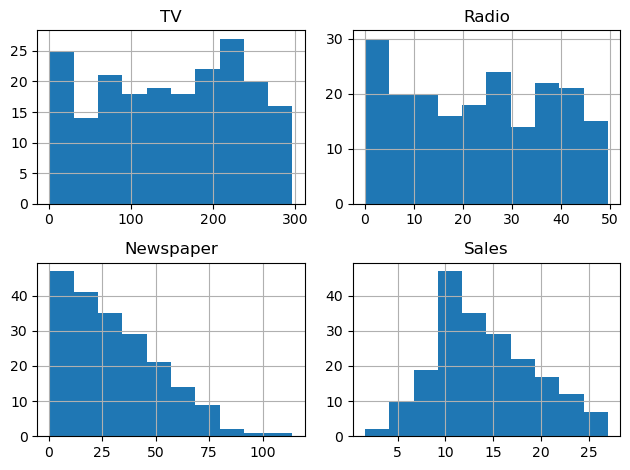

In [13]:
import matplotlib.pyplot as plt
df2[['TV', 'Radio', 'Newspaper', 'Sales']].hist()
plt.tight_layout()
plt.show()

### Data distribution

#### Scaling

<hr>

***Z-score:*** transform the features into distribution with zero mean and 1 standard deviation. Can be defined by the following equation:<br>
<span style="color:red">$\frac{X-\mu}{\sigma}$</span><br>
***Before scalling Mean value:***
<hr>

In [14]:
print("--------------------------")
print(df2[['TV', 'Radio', 'Newspaper', 'Sales']].mean())
print("STD:")
print("--------------------------")
print(df2[['TV', 'Radio', 'Newspaper', 'Sales']].std(ddof=0))

--------------------------
TV           148.7150
Radio         23.4700
Newspaper     30.6495
Sales         14.0100
dtype: float64
STD:
--------------------------
TV           85.015908
Radio        14.823893
Newspaper    21.805492
Sales         5.228499
dtype: float64


<hr>

***After scalling Mean value:***
<hr>

In [15]:
df3=df2.copy()
df3[['TV', 'Radio', 'Newspaper']]=(df3[['TV', 'Radio', 'Newspaper']]-df3[['TV', 'Radio', 'Newspaper' ]].mean())/df3[['TV', 'Radio', 'Newspaper']].std(ddof=0)

In [16]:
print("--------------------------")
print(df3[['TV', 'Radio', 'Newspaper']].mean())
print("STD:")
print("--------------------------")
print(df3[['TV', 'Radio', 'Newspaper']].std(ddof=0))

--------------------------
TV           3.452794e-16
Radio       -1.880718e-15
Newspaper    2.331468e-17
dtype: float64
STD:
--------------------------
TV           1.0
Radio        1.0
Newspaper    1.0
dtype: float64


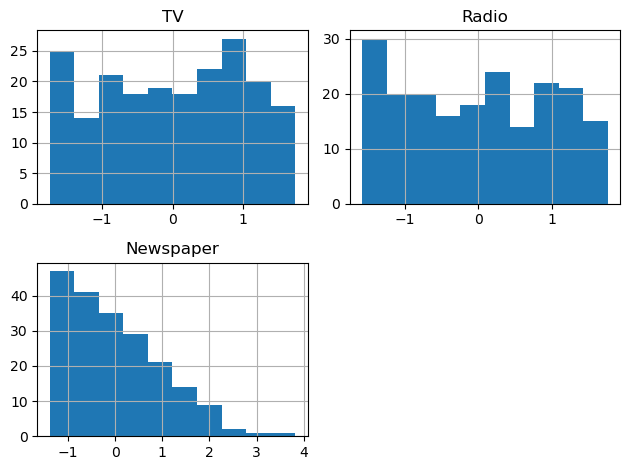

In [20]:
import matplotlib.pyplot as plt
df3[['TV', 'Radio', 'Newspaper']].hist()
plt.tight_layout()
plt.show()


<hr>

# Task
<hr>

 # 1. Generate random 1000X2 size dataframe, where features named "student-ID","course name" and save into csv file format.
 # 2. Class task: Load the Advertising.csv file and do the min-max scaling and display the before and after data distribution.
 
 ***Hits:*** **Minmax scaling:**  transform the features from 0 to 1. Can be defined by the following equation:<br>
<span style="color:red;font-size:50px"> $\frac{X-min}{max-min}$</span><br>
<hr>
<hr>

<!-- <hr>

# Task
<hr>

1. Create a timeseries data and save as txt file.
2. Load the data which is save in task-1.
3. Read "train_wbcd.csv" and print the number of features with missing entries (feature value is zero or null)
4. Fill the missing entries. For filling any feature, you can use either mean or median value of the feature values from observed entries. Explain the reason behind your choice.
5. Encode all the categorical variables and save into csv file.
6. Do the min-max scaling and display the before and after data distribution.

<hr> -->

<hr>

# End of Week 2
<hr>